# 3 - Advanced - Explore Repair and Reuse

In [1]:
import os
from pathlib import Path

testfolder = str(Path().resolve().parent.parent / 'PV_DEMICE' / 'TEMP')

# Another option using relative address; for some operative systems you might need '/' instead of '\'
# testfolder = os.path.abspath(r'..\..\PV_DEMICE\TEMP')  

print ("Your simulation will be stored in %s" % testfolder)

Your simulation will be stored in C:\Users\Silvana\Documents\GitHub\CircularEconomy-MassFlowCalculator\PV_DEMICE\TEMP


In [2]:
import PV_DEMICE

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams.update({'font.size': 22})
plt.rcParams['figure.figsize'] = (12, 5)

## REPAIR

In [4]:
r1 = PV_DEMICE.Simulation(name='Simulation1', path=testfolder)
r1.createScenario(name='Repair_0', file=r'..\baselines\baseline_modules_US.csv')
r1.scenario['Repair_0'].addMaterial('glass', file=r'..\baselines\baseline_material_glass.csv')

r1.createScenario(name='Repair_50', file=r'..\baselines\baseline_modules_US.csv')
r1.scenario['Repair_50'].addMaterial('glass', file=r'..\baselines\baseline_material_glass.csv')


path = C:\Users\Silvana\Documents\GitHub\CircularEconomy-MassFlowCalculator\PV_DEMICE\TEMP


In [5]:
r1.scenario['Repair_0'].data['mod_Repairing'] = 0
r1.scenario['Repair_50'].data['mod_Repairing'] = 50

r1.scenario['Repair_0'].data['mod_reliability_t50'] = 25
r1.scenario['Repair_0'].data['mod_reliability_t90'] = 35
r1.scenario['Repair_50'].data['mod_reliability_t50'] = 25
r1.scenario['Repair_50'].data['mod_reliability_t90'] = 35

# Setting Project Lifetime beyond Failures
r1.scenario['Repair_0'].data['mod_lifetime'] = 50
r1.scenario['Repair_50'].data['mod_lifetime'] = 50

In [6]:
r1.calculateMassFlow()

Working on Scenario:  Repair_0
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  Repair_50
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass


In [7]:
r1.scenario['Repair_0'].data.keys()

Index(['year', 'new_Installed_Capacity_[MW]', 'mod_eff', 'mod_reliability_t50',
       'mod_reliability_t90', 'mod_degradation', 'mod_lifetime', 'mod_MFG_eff',
       'mod_EOL_collection_eff', 'mod_EOL_collected_recycled',
       'mod_Repowering', 'mod_Repairing', 'Area',
       'Cumulative_Area_disposedby_Failure',
       'Cumulative_Area_disposedby_ProjectLifetime',
       'Cumulative_Area_disposed', 'Cumulative_Active_Area',
       'Installed_Capacity_[W]', 'EOL_on_Year_0', 'EOL_on_Year_1',
       'EOL_on_Year_2', 'EOL_on_Year_3', 'EOL_on_Year_4', 'EOL_on_Year_5',
       'EOL_on_Year_6', 'EOL_on_Year_7', 'EOL_on_Year_8', 'EOL_on_Year_9',
       'EOL_on_Year_10', 'EOL_on_Year_11', 'EOL_on_Year_12', 'EOL_on_Year_13',
       'EOL_on_Year_14', 'EOL_on_Year_15', 'EOL_on_Year_16', 'EOL_on_Year_17',
       'EOL_on_Year_18', 'EOL_on_Year_19', 'EOL_on_Year_20', 'EOL_on_Year_21',
       'EOL_on_Year_22', 'EOL_on_Year_23', 'EOL_on_Year_24', 'EOL_on_Year_25',
       'EOL_on_Year_26', 'EOL_on_Ye

In [8]:
AREA = r1.scenario['Repair_0'].data['Area'].iloc[0]

In [9]:
filter_col = [col for col in r1.scenario['Repair_0'].data if col.startswith('EOL_on_Year_')]


In [10]:
Cumul_EOL_R0 = []
Cumul_EOL_R50 = []

foo=0
foo2=0
for life in range (0, len(filter_col)):
    foo +=  r1.scenario['Repair_0'].data[filter_col[life]].iloc[0]
    foo2 += r1.scenario['Repair_50'].data[filter_col[life]].iloc[0]
    Cumul_EOL_R0.append(foo)
    Cumul_EOL_R50.append(foo2)

(0.0, 45.0)

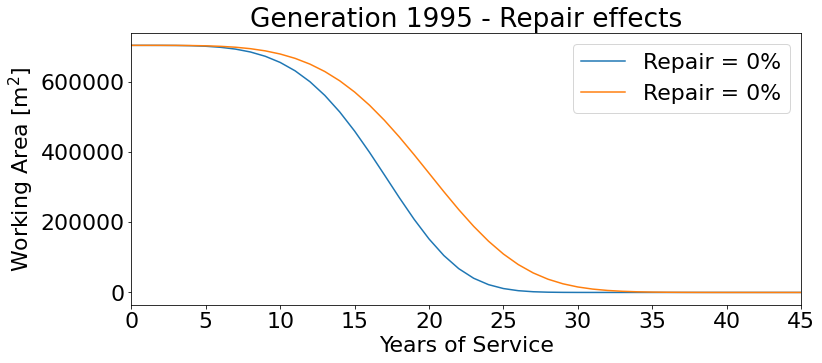

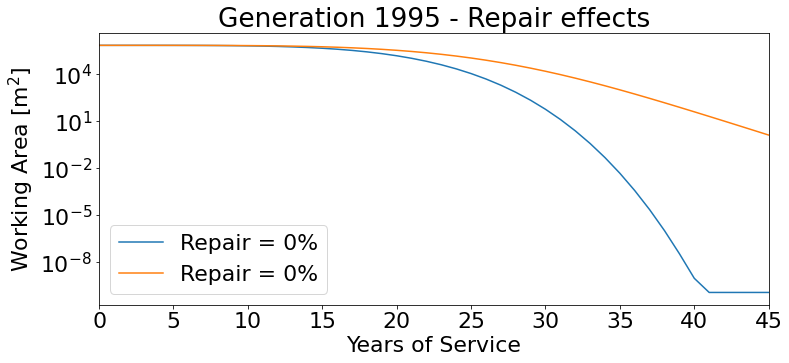

In [11]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.plot(AREA-Cumul_EOL_R0, label='Repair = 0%')
plt.plot(AREA-Cumul_EOL_R50, label='Repair = 0%')
plt.ylabel('Working Area [m$^2$]')
plt.xlabel('Years of Service')
plt.title('Generation 1995 - Repair effects')
plt.legend()
plt.xlim([0,45])

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.plot(AREA-Cumul_EOL_R0, label='Repair = 0%')
plt.plot(AREA-Cumul_EOL_R50, label='Repair = 0%')
ax.set_yscale('log')
plt.ylabel('Working Area [m$^2$]')
plt.xlabel('Years of Service')
plt.title('Generation 1995 - Repair effects')
plt.legend()
plt.xlim([0,45])

(0.0, 45.0)

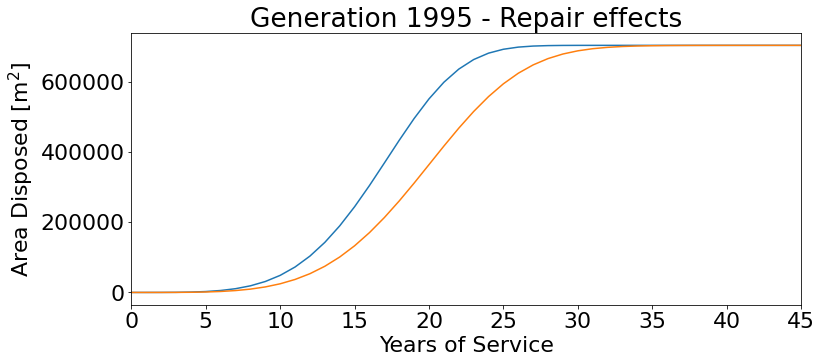

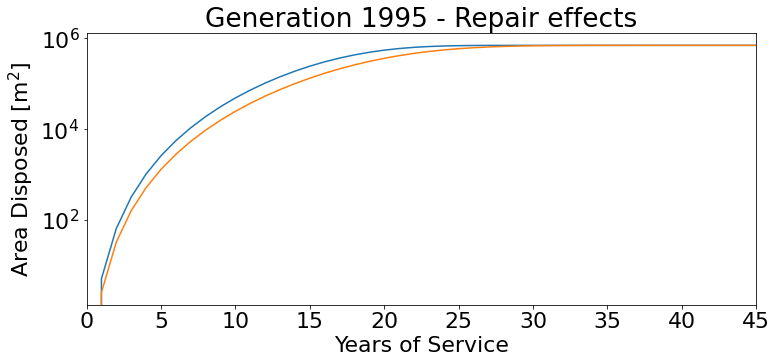

In [12]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.plot(Cumul_EOL_R0)
plt.plot(Cumul_EOL_R50)
plt.ylabel('Area Disposed [m$^2$]')
plt.xlabel('Years of Service')
plt.title('Generation 1995 - Repair effects')
plt.xlim([0,45])

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.plot(Cumul_EOL_R0)
plt.plot(Cumul_EOL_R50)
ax.set_yscale('log')
plt.ylabel('Area Disposed [m$^2$]')
plt.xlabel('Years of Service')
plt.title('Generation 1995 - Repair effects')
plt.xlim([0,45])

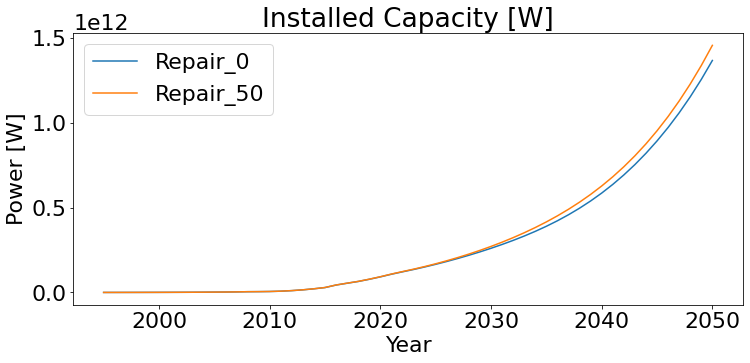

In [13]:
r1.plotScenariosComparison(keyword='Installed_Capacity_[W]')

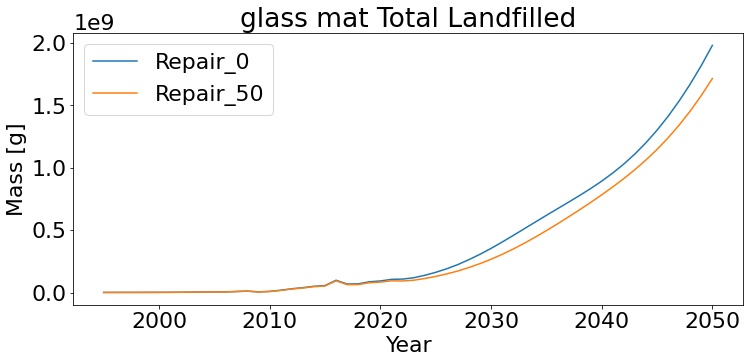

In [14]:
r1.plotMaterialComparisonAcrossScenarios(material='glass', keyword='mat_Total_Landfilled')

## Reuse

Starting a Clean simulation

In [15]:
r1 = PV_DEMICE.Simulation(name='Simulation1', path=testfolder)
r1.createScenario(name='Repower_0', file=r'..\baselines\baseline_modules_US.csv')
r1.scenario['Repower_0'].addMaterial('glass', file=r'..\baselines\baseline_material_glass.csv')

r1.createScenario(name='Repower_50', file=r'..\baselines\baseline_modules_US.csv')
r1.scenario['Repower_50'].addMaterial('glass', file=r'..\baselines\baseline_material_glass.csv')


path = C:\Users\Silvana\Documents\GitHub\CircularEconomy-MassFlowCalculator\PV_DEMICE\TEMP


In [16]:
r1.scenario['Repower_0'].data['mod_Repowering'] = 0
r1.scenario['Repower_50'].data['mod_Repowering'] = 50
r1.scenario['Repower_50'].data['mod_Repowering'] = 50

r1.scenario['Repower_0'].data['mod_reliability_t50'] = 35
r1.scenario['Repower_0'].data['mod_reliability_t90'] = 45
r1.scenario['Repower_50'].data['mod_reliability_t50'] = 35
r1.scenario['Repower_50'].data['mod_reliability_t90'] = 45

# Setting Project Lifetime beyond Failures
r1.scenario['Repower_0'].data['mod_lifetime'] = 25
r1.scenario['Repower_50'].data['mod_lifetime'] = 25

In [17]:
r1.calculateMassFlow()

Working on Scenario:  Repower_0
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  Repower_50
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass


In [18]:
r1.scenario['Repower_50'].data.keys()

Index(['year', 'new_Installed_Capacity_[MW]', 'mod_eff', 'mod_reliability_t50',
       'mod_reliability_t90', 'mod_degradation', 'mod_lifetime', 'mod_MFG_eff',
       'mod_EOL_collection_eff', 'mod_EOL_collected_recycled',
       'mod_Repowering', 'mod_Repairing', 'Area',
       'Cumulative_Area_disposedby_Failure',
       'Cumulative_Area_disposedby_ProjectLifetime',
       'Cumulative_Area_disposed', 'Cumulative_Active_Area',
       'Installed_Capacity_[W]', 'EOL_on_Year_0', 'EOL_on_Year_1',
       'EOL_on_Year_2', 'EOL_on_Year_3', 'EOL_on_Year_4', 'EOL_on_Year_5',
       'EOL_on_Year_6', 'EOL_on_Year_7', 'EOL_on_Year_8', 'EOL_on_Year_9',
       'EOL_on_Year_10', 'EOL_on_Year_11', 'EOL_on_Year_12', 'EOL_on_Year_13',
       'EOL_on_Year_14', 'EOL_on_Year_15', 'EOL_on_Year_16', 'EOL_on_Year_17',
       'EOL_on_Year_18', 'EOL_on_Year_19', 'EOL_on_Year_20', 'EOL_on_Year_21',
       'EOL_on_Year_22', 'EOL_on_Year_23', 'EOL_on_Year_24', 'EOL_on_Year_25',
       'EOL_on_Year_26', 'EOL_on_Ye

In [19]:
AREA = r1.scenario['Repower_50'].data['Area'].iloc[0]

In [20]:
filter_col = [col for col in r1.scenario['Repower_50'].data if col.startswith('EOL_on_Year_')]

In [21]:
Cumul_EOL_R0 = []
Cumul_EOL_R50 = []

foo=0
foo2=0
for life in range (0, len(filter_col)):
    foo +=  r1.scenario['Repower_0'].data[filter_col[life]].iloc[0]
    foo2 += r1.scenario['Repower_50'].data[filter_col[life]].iloc[0]
    Cumul_EOL_R0.append(foo)
    Cumul_EOL_R50.append(foo2)

(0.0, 45.0)

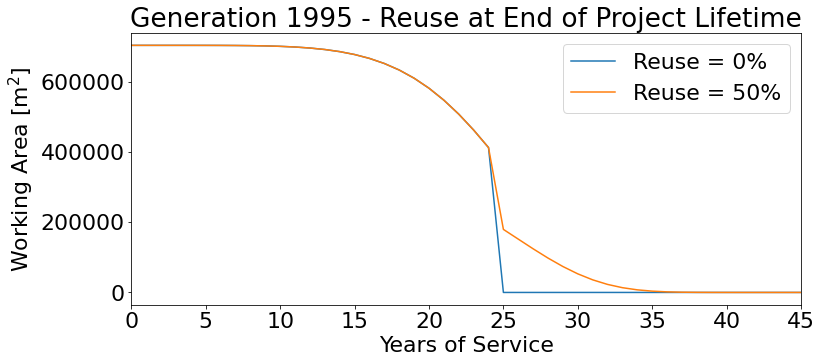

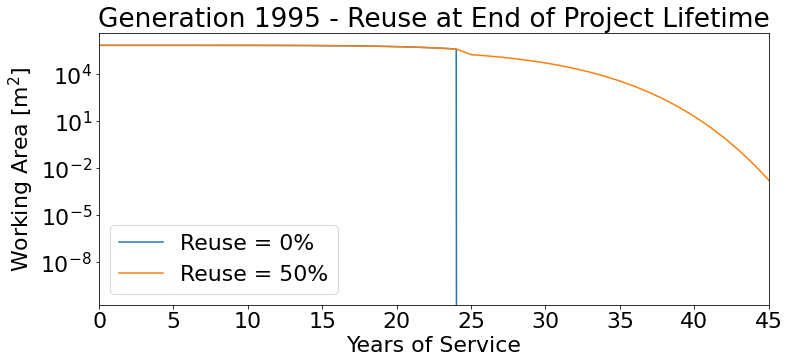

In [22]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.plot(AREA-Cumul_EOL_R0, label='Reuse = 0%')
plt.plot(AREA-Cumul_EOL_R50, label='Reuse = 50%')
plt.ylabel('Working Area [m$^2$]')
plt.xlabel('Years of Service')
plt.title('Generation 1995 - Reuse at End of Project Lifetime')
plt.legend()
plt.xlim([0,45])

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.plot(AREA-Cumul_EOL_R0, label='Reuse = 0%')
plt.plot(AREA-Cumul_EOL_R50, label='Reuse = 50%')
plt.legend()
ax.set_yscale('log')
plt.ylabel('Working Area [m$^2$]')
plt.xlabel('Years of Service')
plt.title('Generation 1995 - Reuse at End of Project Lifetime')
plt.xlim([0,45])

(0.0, 45.0)

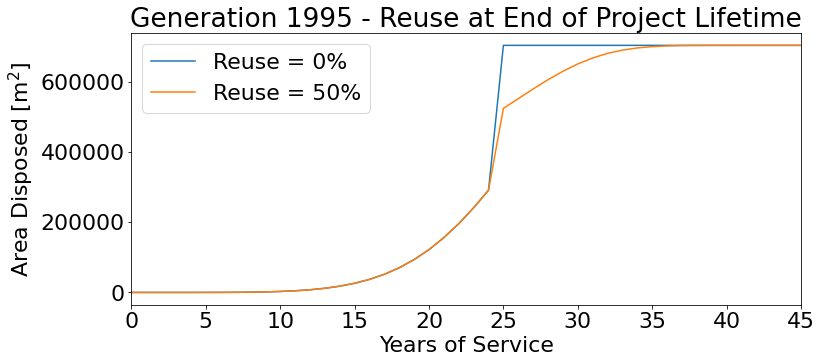

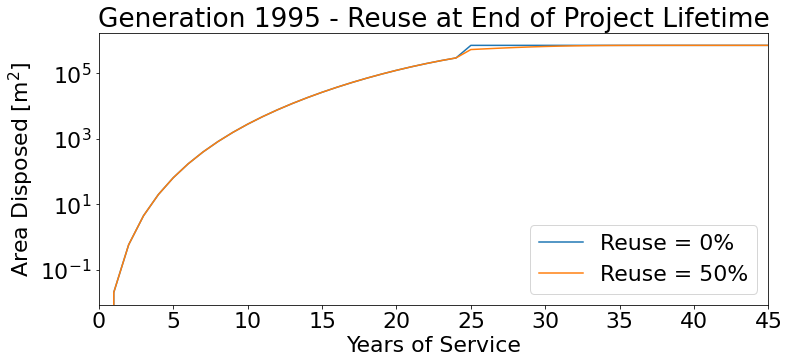

In [23]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.plot(Cumul_EOL_R0, label='Reuse = 0%')
plt.plot(Cumul_EOL_R50, label='Reuse = 50%')
plt.ylabel('Area Disposed [m$^2$]')
plt.xlabel('Years of Service')
plt.title('Generation 1995 - Reuse at End of Project Lifetime')
plt.legend()
plt.xlim([0,45])

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.plot(Cumul_EOL_R0, label='Reuse = 0%')
plt.plot(Cumul_EOL_R50, label='Reuse = 50%')
ax.set_yscale('log')
plt.ylabel('Area Disposed [m$^2$]')
plt.xlabel('Years of Service')
plt.title('Generation 1995 - Reuse at End of Project Lifetime')
plt.legend()
plt.xlim([0,45])

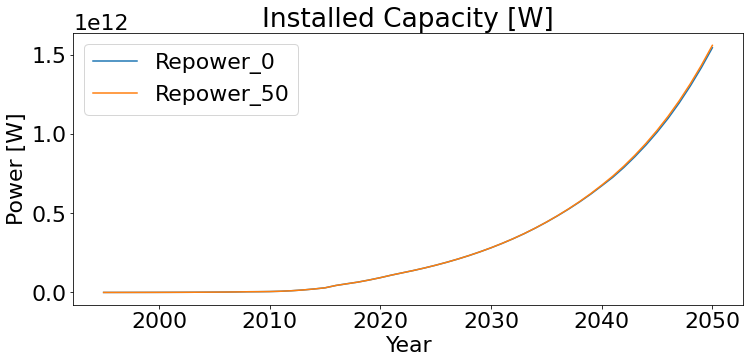

In [24]:
r1.plotScenariosComparison(keyword='Installed_Capacity_[W]')

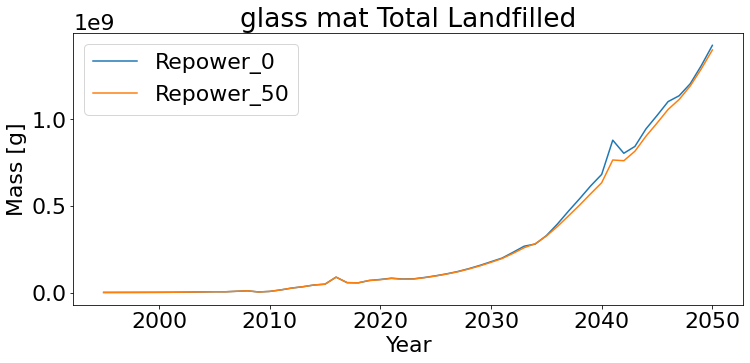

In [25]:
r1.plotMaterialComparisonAcrossScenarios(material='glass', keyword='mat_Total_Landfilled')